# Feature Selection and Extraction

Algorithms for supervised Machine Learning require labeled training data. Usually the provision of labeled data is *expensive*. The question *How much data do we require to learn a robust model?* is of main interest. There is no unique answer to this question, but the *Curse of Dimensionality* states: *The number of required training data increases exponentially with the number of parameters, that must be learned*. The number of learnable parameters strongly depends on the number of features that are passed to the machine learning algorithm. Hence, one should avoid to pass features to the algorithm, which are not relevant. **Feature Selection** is the task of discriminating irrelevant from relevant features. This task can be realized e.g. by

* statistical-tests and correlation analysis
* data-visualization
* domain-knowledge

**Feature Extraction**, like Feature Selection, reduces the number of attributes, that are passed to the ML algorithm. However, feature extraction transforms the original space into a new, lower-dimensional space. The dimensions in the new space are usually not directly interpretable features, but e.g. linear combinations of the original features. Feature extraction methods such as the *Principal Component Analysis (PCA)* try to find a low-dimensional representation, in which a maximum ratio of the original information is retained, while redundancy is removed.   


## Univariate Feature Selection Tests
Goal of univariate feature selection is to select a set of most informative features, based on univariate statistical tests. In scikit-learn the following tests are available:

* **Regression:** [Mutual Information for Regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression), [f-measure for regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* **Classification:** [Mutual Information for Classification](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif), [$ \chi^2 $-test](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f-measure for classification](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif).

For unsupervised learning for example the [sklearn.feature_selection.VarianceThreshold class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) can be applied. This method just analysis the variance of a single feature and does not require a class-label or regression target-value.


### Entropy

The entropy of a discrete random variable $X$ measures the uncertainty of this random variable. It is calculated by

\begin{equation} H(X) = -\sum_{x \in X} p(x) \log_2(p(x)). 
\end{equation} 

The uncertainty is minimal ($H(X)=0$), if the variable has only one value. The uncertainty is maximal ($H(x)=\log_2(K)$) if each of the $K$ possible values for $x$ appears equaly likely.

### Mutual Information, Information Gain, Kullback-Leibler Divergence
The **mutual information**  between two random variables measures how much knowing one of these variables reduces uncertainty about the other. For discrete random variables $X$ and $Y$ the mutual information is calculated as follows: 

\begin{equation} 
I(X,Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \log_2 \left( \frac{p(x,y)}{p(x)p(y)} \right), 
\end{equation} 

and for continuous variables:

\begin{equation} 
I(X,Y) = \int_{y \in Y} \int_{x \in X} p(x,y) \log_2 \left( \frac{p(x,y)}{p(x)p(y)} \right) dx dy, \end{equation} 

If $X$ and $Y$ are independent of each other, the mutual information is 0. A higher value indicates a stronger dependency between the pair of variables.
Note that the estimated mutual information can also be negative. However, the [scikit-learn mutual_information function](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) returns 0, if the estimate would be negative.

As in the example below, the mutual information is calculated between a single feature and the target variable. In the example below the mutual information between the feature `atemp` and `bikerental-count` is maximal. Features with a low mutual information, e.g. `holiday`, could be ignored.

#### Relation of Mutual Information to other Metrics

* Mutual Information is the same as **Information Gain**, which is an important measure for feature importance in the learning of decision trees and tree-based ensemble machine-learning algorithms.
* As already mentioned above: Mutual information defines the uncertainty of a random variable $X$, if the value of another random variable $Y$ is known. The uncertainty-difference between the entropy $H(X)$ and $I(X,Y)$ is the conditional entropy $H(X|Y)$:

\begin{equation} 
I(X,Y) = H(X)-H(X|Y) = H(X)-\sum_{y \in Y} H(X|Y=y) 
\end{equation}

\begin{equation} 
I(Y) = H(Y)-H(Y|X) = H(Y)-\sum_{x \in X} H(Y|X=x) 
\end{equation}

* Mutual information is the expected value of the **Pointwise Mutual Information (PMI):**

\begin{equation} 
PMI(X,Y) = \log_2 \left( \frac{p(x,y)}{p(x)p(y)} \right), 
\end{equation} 

* The [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) $D_{KL}(p(x)||q(y))$ is a measure of how one probability distribution $p(x)$ diverges from a second, expected probability distribution $q(y)$. Mutual information is the expected Kullback-Leibler divergence between the joint distribution $p(x,y)$ and the product of distributions $p(x)p(y)$.

\begin{equation} 
I(X,Y)=D_{KL}(p(x,y))||p(x)p(y))
\end{equation}


#### Example for Mutual Information
Import the userbehavior-data file into a pandas frame. The file contains artificial data of 15 persons, which tested a new application. The features are metrics, which have been tracked during the 3-week trial period. The class label `Service Chosen` defines, whether and which service the person purchased after the trial-period. In this example the mutual information of the feature `Read FAQ` with respect to the class label `Service Chosen` shall be calculated. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import feature_selection as fs

In [2]:
userData=pd.read_csv('../Data/userbehavior.txt')
header=list(userData.columns)
userData

,Referrer,Location,Read FAQ,Pages Viewed,Service Chosen
0,Slashdot,USA,Yes,18,None
1,Google,France,Yes,23,Premium
2,Digg,USA,Yes,24,Basic
3,Kiwitobes,France,Yes,23,Basic
4,Google,UK,No,21,Premium
5,(direct),NewZealand,No,12,None
6,(direct),UK,No,21,Basic
7,Google,USA,No,24,Premium
8,Slashdot,France,Yes,19,None
9,Digg,USA,No,18,None


First the `crosstab`-method of pandas is applied to calculate the contingency table of the two variables. The entries of this table are the joint frequencies of the values of the considered variables.

In [3]:
freqtab=pd.crosstab(index=userData["Read FAQ"],columns=userData["Service Chosen"])
display(freqtab)
freqtabMargins=pd.crosstab(index=userData["Read FAQ"],columns=userData["Service Chosen"],margins=True)
display(freqtabMargins)

Service Chosen,Basic,None,Premium
Read FAQ,,,
No,1,4,2
Yes,5,2,1


Service Chosen,Basic,None,Premium,All
Read FAQ,,,,
No,1,4,2,7
Yes,5,2,1,8
All,6,6,3,15


**Variant 1:** Manually calculate the mutual information according to the formula \begin{equation} I(X,Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \log_2 \left( \frac{p(x,y)}{p(x)p(y)} \right), \end{equation}

In [4]:
mutualinf=0
for row in ["No","Yes"]:
    for col in ["Basic","None","Premium"]:
        pxy=float(freqtabMargins.loc[row][col])/freqtabMargins.loc["All"]["All"]
        px=float(freqtabMargins.loc["All"][col])/freqtabMargins.loc["All"]["All"]
        py=float(freqtabMargins.loc[row]["All"])/freqtabMargins.loc["All"]["All"]
        mutualinf+=pxy*np.log2(pxy/(px*py))
print("Mutual Information of feature Read FAQ: ",mutualinf)

Mutual Information of feature Read FAQ:  0.18580516288960103


Knowing the value of `Read FAQ` reduces the uncertainty on the class label by an amount of $0.186$.

**Variant 2:** Next, we manually calculate the mutual information by applying the information-gain-formula
\begin{equation} I(X,Y) = H(X)-H(X|Y) = H(X)-\sum_{y \in Y} H(X|Y=y) \end{equation} 
In this approach, we first calculate the uncertainty (entropie) of the class-label, then the uncertainties for given values of `Read FAQ` are calculated. This is the usual formula to calculate *information gain*, which is actually the same as mutual information.

In [5]:
EntropieAll=-1*np.sum([float(p)/freqtabMargins.loc["All"][3]
                       *np.log2(float(p)/freqtabMargins.loc["All"][3]) 
                       for p in freqtabMargins.loc["All"]])
print("Uncertainty of class label: ",EntropieAll)

Uncertainty of class label:  1.5219280948873621


In [6]:
EntropieNo=-1*np.sum([float(p)/freqtabMargins.loc["No"][3]
                      *np.log2(float(p)/freqtabMargins.loc["No"][3]) 
                      for p in freqtabMargins.loc["No"]])
print("Uncertainty of class label if READ FAQ = No: ",EntropieNo)

Uncertainty of class label if READ FAQ = No:  1.3787834934861753


In [7]:
EntropieYes=-1*np.sum([float(p)/freqtabMargins.loc["Yes"][3]
                       *np.log2(float(p)/freqtabMargins.loc["Yes"][3]) 
                       for p in freqtabMargins.loc["Yes"]])
print("Uncertainty of class label if READ FAQ = Yes: ",EntropieYes)

Uncertainty of class label if READ FAQ = Yes:  1.2987949406953985


In [8]:
MutualInfReadFAQ=EntropieAll-(7.0/15*EntropieNo+8.0/15*EntropieYes)
print("Mutual Information of feature Read FAQ: ",MutualInfReadFAQ)

Mutual Information of feature Read FAQ:  0.18580516288960114


**Variant 3:** Apply [scikit-learn function sklearn.feature_selection.mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) for calculation of mutual information. In order to apply this function, the non-numeric variables must first be transformed into a numeric format. For this the `LabelEncoder` of `scikit-learn` is applied: 

In [9]:
from sklearn.preprocessing import LabelEncoder
X= userData.values
display(userData)
catCols=["Referrer","Location","Read FAQ","Service Chosen"]
for c in catCols:
    enclabel= LabelEncoder()
    userData[c] = enclabel.fit_transform(userData[c].values)
display(userData)

,Referrer,Location,Read FAQ,Pages Viewed,Service Chosen
0,Slashdot,USA,Yes,18,None
1,Google,France,Yes,23,Premium
2,Digg,USA,Yes,24,Basic
3,Kiwitobes,France,Yes,23,Basic
4,Google,UK,No,21,Premium
5,(direct),NewZealand,No,12,None
6,(direct),UK,No,21,Basic
7,Google,USA,No,24,Premium
8,Slashdot,France,Yes,19,None
9,Digg,USA,No,18,None


,Referrer,Location,Read FAQ,Pages Viewed,Service Chosen
0,4,3,1,18,1
1,2,0,1,23,2
2,1,3,1,24,0
3,3,0,1,23,0
4,2,2,0,21,2
5,0,1,0,12,1
6,0,2,0,21,0
7,2,3,0,24,2
8,4,0,1,19,1
9,1,3,0,18,1


In [10]:
featureCols=["Referrer","Location","Read FAQ","Pages Viewed"]
X=userData[featureCols].values
y=userData["Service Chosen"].values
mi_all=fs.mutual_info_classif(X,y,discrete_features=True)
for i,f in enumerate(featureCols):
    print("Mutual information of feature %s : %1.3f"%(f,mi_all[i]))

Mutual information of feature Referrer : 0.391
Mutual information of feature Location : 0.056
Mutual information of feature Read FAQ : 0.129
Mutual information of feature Pages Viewed : 0.408


As can be seen the mutual information for `Read FAQ` is not equal to the values calculated manually in variant 1 and 2. This is because [scikit-learn function sklearn.feature_selection.mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) applies an approximation for the mutual-information-calculation.

### $\chi^2$-Test
If two random variables $X$ and $Y$ are independent, then $P(X \cap Y)=P(X) \cdot P(Y)$. Hence, independence can be tested by determining the difference between the joint probability $P(X \cap Y)$ and the product $P(X) \cdot P(Y)$. If this difference is small, then the 2 variables can be assumed to be independent. 

The chi-square test of independence is based on the idea, which has been described above. The test defines a metric for measuring the difference between $P(X \cap Y)$ and the product $P(X) \cdot P(Y)$. This metric is

$$
\chi^2=\sum\limits_{i \in D_X} \sum\limits_{j \in D_Y} \frac{(f_{ij}-e_{ij})^2}{e_{ij}},
$$

where $D_X$ and $D_Y$ are the value ranges of $X$ and $Y$, respectively. $f_{ij}$ is the observed frequency count of events belonging to both $X=i$ and $Y=j$. The values $e_{ij}$ are the corresponding expected count if $X$ and $Y$ are independent. It is assumed that the $\chi^2$-value is distributed according to a [$\chi^2$-distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) with 

$$
k=|D_X-1|\cdot |D_Y-1|
$$ 

degrees of freedom.

The probability-density function of $\chi^2$-distributions for different degrees of freedom are plotted in the code cell below:


In [11]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

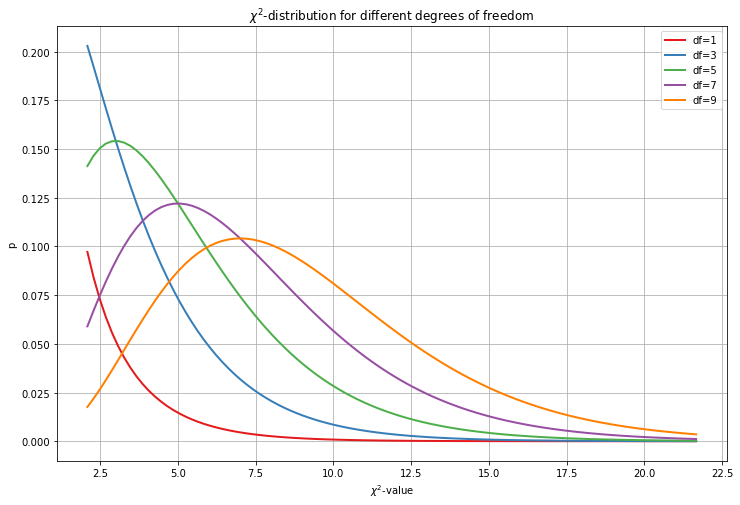

In [12]:
dfset = [1,3,5,7,9]
palette = plt.get_cmap('Set1')
x = np.linspace(chi2.ppf(0.01, 9),chi2.ppf(0.99, 9), 100)
plt.figure(figsize=(12,8))
num=0
for df in dfset:
    rv = chi2(df)
    plt.plot(x, rv.pdf(x), '-',color=palette(num), 
             lw=2, label="df="+str(dfset[num]))
    num+=1
plt.legend()
plt.grid(True)
plt.title("$\chi^2$-distribution for different degrees of freedom")
plt.xlabel("$\chi^2$-value")
plt.ylabel("p")
plt.show()


The $\chi^2$-test returns 2 values: the $\chi^2$-value and the corresponding $p-value$. As can be seen in the $\chi^2$-distribution plot above, higher values for $\chi^2$ yield a smaller $p$. Usually for a p-value less than $0.05$, the null-hypotheses, which states that the two variables $X$ and $Y$ are independent, is rejected. In this case the two variables are considered to be dependent.

#### Example for $\chi^2$-test
Import the insurance-data file into a pandas frame. The file contains data for 1338 clients of an insurance company. In this example the $\chi^2$-test shall be applied to test whether the variables `sex` and `smoker` are independent.  

In [13]:
insData=pd.read_csv('../Data/insurance.csv')
header=list(insData.columns)
insData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


First the `crosstab`-method of pandas is applied to calculate the contingency table of the two variables. The entries of this table are the joint frequencies of the values of the considered variables.

In [14]:
freqtab=pd.crosstab(index=insData["smoker"],columns=insData["sex"])
display(freqtab)
freqtabMargins=pd.crosstab(index=insData["smoker"],
                           columns=insData["sex"],margins=True)
display(freqtabMargins)

sex,female,male
smoker,,
no,547,517
yes,115,159


sex,female,male,All
smoker,,,
no,547,517,1064
yes,115,159,274
All,662,676,1338


From the contingency-table with margins, the $\chi^2$-value can easily be calculated as defined in the formula above:

In [15]:
chi2val=(((547-1064*662/1338.0)**2)/(1064*662/1338.0) #(f11-e11)^2/e11
 +((517-1064*676/1338.0)**2)/(1064*676/1338.0) #(f12-e12)^2/e12
 +((115-274*662/1338.0)**2)/(274*662/1338.0) #(f21-e21)^2/e21
 +((159-274*676/1338.0)**2)/(274*676/1338.0)) #(f22-e22)^2/e22
print("Manually calculated chi2-value: ",chi2val)

Manually calculated chi2-value:  7.765921028604452


Since both variables `X` and `Y`, have only two possible values, the corresponding degree of freedom of the $\chi^2$-distribution is 1. As can be seen in the $\chi^2$-plot above the curve for $df=1$ has a value far below $0.05$ at $\chi^2=7.766$. Hence, the null-hypotheses can be rejected, i.e. the two variables **`sex` and `smoker` are dependent**. 

Applying [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) the $\chi^2$-statistic can be calculated as follows:

In [16]:
from scipy.stats import chi2_contingency
chi2v,p,df,corr=chi2_contingency(freqtab,correction=False)
print("chi2 value: ",chi2v)
print("p-value: ",p)
print("degrees of freedom: ",df)

chi2 value:  7.765921028604452
p-value:  0.005324114164320537
degrees of freedom:  1


>**Note:** The [scikit-learn function sklearn.feature_selection.chi2](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) seems to apply an approximation for the $\chi^2$-value calculation. The result differs from the formula above and from the result calculated by the scipy-function. 

### F-Measure
In general a [F-test](https://en.wikipedia.org/wiki/F-test) is a statistical test in which the test-statistic has an [F-distribution](https://en.wikipedia.org/wiki/F-distribution) under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled.

> **Note:** The F-test assumes that data is approximately normal-distributed.  

In this notebook the F-test is applied for assessing feature importance. For this one must distinguish classification and regression.

#### F-test for classification

The F-test in one-way analysis of variance (**ANOVA**) is used to assess whether the expected values of a quantitative variable within several pre-defined groups differ from each other. In the contest of feature-assessment for classification, the groups are the different classes and the F-measure is the quotient 

\begin{equation} 
F=\frac{\mbox{between-group variability}}{\mbox{within-group variability}} 
\end{equation}

If the feature of interest varies significantly between the considered classes (high between-group variability) and varies only slightly within a single class, this feature provides much information for discriminating the classes. In this case the F-value is high.

The **between-group variability** is calculated by

\begin{equation} 
\frac{1}{K-1} \sum\limits_{i=1}^K n_i (\overline{m}_i -\overline{m})^2, 
\end{equation}

where $K$ is the number of classes (groups), $\overline{m}_i$ is the mean of the considered feature within group $i$, $n_i$ is the number of samples in group $i$ and $\overline{m}$ is the overall mean of the feature.

The **within-group variability** is calculated by

\begin{equation} 
\frac{1}{N-K} \sum\limits_{i=1}^K \sum\limits_{j=1}^{n_i} (x_{i,j}-\overline{m}_i)^2, 
\end{equation}

where $x_{i,j}$ is the j.th feature value in the i.th group and N is the overall sample size.

This F-statistic follows the F-distribution with degrees of freedom $d_1 = K − 1$ and $d_2 = N − K$ under the null hypothesis. Here, the null-hypothesis states, that there is no significant difference in the variance within the groups and the variance of the entire sample.

**Example F-measure for classification:** A sample of $N=9$ observations, each described by 3 featues is assigned to the numpy array `X`. The class-labels of the $9$ observations are defined in the vector `y`.

In [17]:
X=np.array([
    [2,3,1],
    [4,4,3],
    [1,1,12],
    [3,2,9],
    [9,5,7],
    [10,6,8],
    [12,9,13],
    [13,7,14],
    [15,8,11],
])
y=np.array([0,0,0,0,1,1,1,1,1])
N=9
n0=4
n1=5
K=2
print(X)
print(y)

[[ 2  3  1]
 [ 4  4  3]
 [ 1  1 12]
 [ 3  2  9]
 [ 9  5  7]
 [10  6  8]
 [12  9 13]
 [13  7 14]
 [15  8 11]]
[0 0 0 0 1 1 1 1 1]


First, the set of 9 observations is partitioned into $K=2$ groups, according to the class-label as defined in `y`. For each group and for the overall sample the corresponding mean is calculated:

In [18]:
group0=X[y==0,:] #group 0 is defined by class-label y=0
group1=X[y==1,:] #group 1 is defined by class-label y=1
m0=np.mean(group0,axis=0) #mean of first group
m1=np.mean(group1,axis=0) #mean of second group
m=np.mean(X,axis=0) #overall mean

Then the between-group variability for the 3 featues is calculated:

In [19]:
betweenGroupVar=1.0/(K-1) * (n0*(m0-m)**2+n1*(m1-m)**2)
print("between-group variability is: ",betweenGroupVar)

between-group variability is:  [192.2   45.    42.05]


Next, the within-group variability is calculated for each of the 3 features:

In [20]:
b0=(group0-m0)**2
b1=(group1-m1)**2
s0=b0.sum(axis=0)
s1=b1.sum(axis=0)

withinGroupVar=(s0+s1)/float((N-K))
print("within-group variability is: ",withinGroupVar)

within-group variability is:  [ 3.97142857  2.14285714 16.56428571]


From the two variability-values the F-measure can be calculated as follows:

In [21]:
F=betweenGroupVar/withinGroupVar
print("F-measure of feature 1: ",F[0])
print("F-measure of feature 2: ",F[1])
print("F-measure of feature 3: ",F[2])

F-measure of feature 1:  48.39568345323742
F-measure of feature 2:  21.0
F-measure of feature 3:  2.5385942216472617


We apply the corresponding [scikit-learn method f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) in order to verify the result. The sklearn-function not only provides the f-value, but also the corresponding p-value. For all p-values $<0.05$ the null-hypothesis is rejected. In this case the null-hypothesis for feature 3 is not rejected, which means that the variance in the two groups, defined by the class-label, do not differ significantly from the variance of the entire sample. This implies, that feature 3 provides only small information for discriminating the two classes.

In [22]:
fskl,pskl=fs.f_classif(X,y)
i=1
for fv,pv in zip(fskl,pskl):
    print("Feature %d: F-measure=%4.2f \t p-value=%1.5f"%(i,fv,pv))
    i+=1

Feature 1: F-measure=48.40 	 p-value=0.00022
Feature 2: F-measure=21.00 	 p-value=0.00254
Feature 3: F-measure=2.54 	 p-value=0.15512


In order to better understand between-group- and within-group-variability, we visualize each of the 3 features w.r.t. to their group-membership.

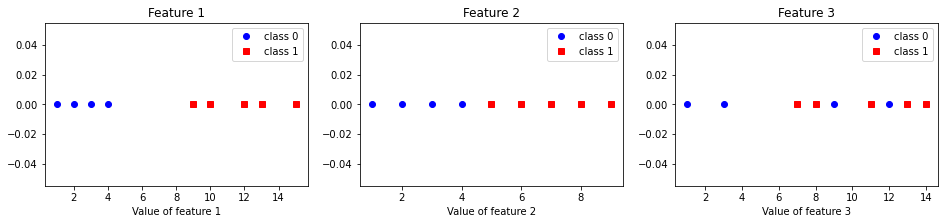

In [23]:
plt.figure(figsize=(16,3))
for feat in range(3):
    plt.subplot(1,3,feat+1)
    plt.title("Feature %d"%(feat+1))
    plt.xlabel("Value of feature %d"%(feat+1))
    plt.plot(group0[:,feat],np.zeros(n0),"bo",label="class 0")
    plt.plot(group1[:,feat],np.zeros(n1),"rs",label="class 1")
    plt.legend()
plt.show()

As can be seen in the graphic above:
* feature 1 has a high between-group-variability, i.e. there is a quite large distance between the centers of the groups
* feature 2 has a relatively small between-group-variability, but a low within-group-variability, resulting in a relatively high F-measure
* feature 3 has a relatively small between-group-variability, and a relatively high within-group-variability, resulting in a relatively low F-measure

#### F-test for regression
In general, an F-test in regression compares the fits of different linear models. In the case that the F-test is applied for assessing feature importance for regression, it compares a **model with no predictors** to the model that you specify (e.g. a linear-regression model). A regression model that contains no predictors is also known as an intercept-only model. I.e. it is just the average over all target-values 

$$
\overline{y}=\sum_i y_i.
$$

The null-hypothesis states that the fit of the intercept-only model and the specified model are equal. If the null-hypothesis is rejected, the feature which is applied as input to the specified model, can be considered to be *informative*.

The F-measure itself is calculated as follows:

\begin{equation} 
F=\frac{\frac{RSS_1-RSS_2}{p_2-p_1}}{\frac{RSS_2}{n-p_2-1}},
\end{equation}

where $RSS_i$ is the [Residual Sum of Squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares) of the i.th model, $p_2$ is the number of parameters in the specified model, and $p_1$ is the number of parameters of the simpler model. Note, that in our case, the simpler model is the intercept-only model with $p_1=0$. The number of observations in the sample is $n$.

The F-statistic follows an f-distribution with $(p_2-p_1,n-p_2)$ degrees of freedom.

**Example:**

In [24]:
N=5
X=np.array([[1,2,3,4,5],
            [4,2,3,7,3]
           ]).T
y=np.array([3,5.5,6,8.5,11.2])
print(X)
print(y)

[[1 4]
 [2 2]
 [3 3]
 [4 7]
 [5 3]]
[ 3.   5.5  6.   8.5 11.2]


In [25]:
freg,preg = fs.f_regression(X,y)
i=1
for fv,pv in zip(freg,preg):
    print("Feature %d: F-measure=%4.2f \t p-value=%1.5f"%(i,fv,pv))
    i+=1

Feature 1: F-measure=82.06 	 p-value=0.00284
Feature 2: F-measure=0.09 	 p-value=0.78172


From this values we conclude, that for feature 1 the null-hypothesis can be rejected, i.e. the linear model, learned from feature 1 is significantly better than the intercept-only model. For feature 2 the null-hypothesis can not be rejected.

In the code cells below, the concept of the F-test shall be visualized. For both features a linear model is calculated. The plots show, that for the model built from feature 1, the RSS-values (i.e. die distances between the model's prediction and the true target) are much smaller than for the intercept-only model. For feature 2 this is not the case.

In [26]:
interceptOnly=np.sum(y)/float(N)
print("Intercept-Only model with no parameters: ",interceptOnly)

Intercept-Only model with no parameters:  6.840000000000001


In [27]:
from sklearn.linear_model import LinearRegression
linmod=LinearRegression()
linmod.fit(np.atleast_2d(X[:,0]).T,y)
print(linmod.intercept_)
print(linmod.coef_)

1.0199999999999987
[1.94]


In [28]:
linmod2=LinearRegression()
linmod2.fit(np.atleast_2d(X[:,1]).T,y)
print(linmod2.intercept_)
print(linmod2.coef_)

5.777027027027028
[0.27972973]


/Users/johannes/opt/anaconda3/envs/dsmmlbook/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/Users/johannes/opt/anaconda3/envs/dsmmlbook/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


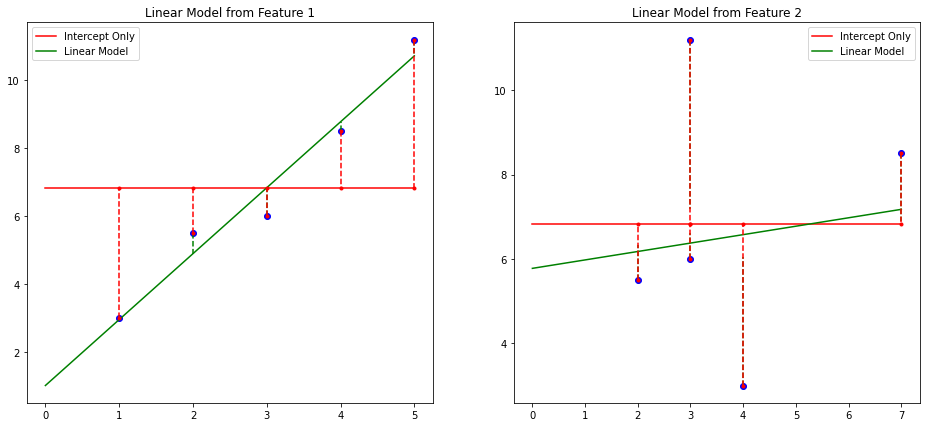

In [29]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(X[:,0],y,"bo")
plt.title("Linear Model from Feature 1")
plt.plot([0,5],[interceptOnly,interceptOnly],"r-",label="Intercept Only")
plt.plot([0,5],[linmod.intercept_,linmod.intercept_+5*linmod.coef_],"g-",label="Linear Model")
for i in range(N):
    plt.plot([X[i,0],X[i,0]],[y[i],linmod.intercept_+X[i,0]*linmod.coef_],"g--")
    plt.plot([X[i,0],X[i,0]],[y[i],interceptOnly],"r--.")
plt.legend()

plt.subplot(1,2,2)
plt.plot(X[:,1],y,"bo")
plt.title("Linear Model from Feature 2")
plt.plot([0,7],[interceptOnly,interceptOnly],"r-",label="Intercept Only")
plt.plot([0,7],[linmod2.intercept_,linmod2.intercept_+5*linmod2.coef_],"g-",label="Linear Model")
for i in range(N):
    plt.plot([X[i,1],X[i,1]],[y[i],linmod2.intercept_+X[i,0]*linmod2.coef_],"g--")
    plt.plot([X[i,1],X[i,1]],[y[i],interceptOnly],"r--.")
plt.legend()

plt.show()

### Variance Threshold
This test does not require labeled data, i.e. it can be applied for feature selection in the context of unsupervised learning. 
Features, whose values do not vary significantly for the given datasamples usually provide only marginal information. Such features can then be excluded. The [sklearn.feature_selection.VarianceThreshold class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) calculates the variance of all features in a given dataset and removes the features with low variance. 

In the following example the variance of the feature in the last column is below the configured threshold of $0.3$. Hence, it is removed.

In [30]:
data=np.array([[1,2,3,40],[1,4,1,30],[2,7,5,40],[1,4,6,30],[0,5,4,40]])
print(data)

[[ 1  2  3 40]
 [ 1  4  1 30]
 [ 2  7  5 40]
 [ 1  4  6 30]
 [ 0  5  4 40]]


In [31]:
featureSelector=fs.VarianceThreshold(threshold=0.3)
reducedData=featureSelector.fit_transform(data)
print(reducedData)

[[ 1  2  3 40]
 [ 1  4  1 30]
 [ 2  7  5 40]
 [ 1  4  6 30]
 [ 0  5  4 40]]


## Feature Selectors in sklearn
In the previous chapters feature selection tests have been described: Mutual Information, $\chi^2$ and F-Measure. These statistical tests are applied by *Sklearn*-feature selectors such as [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) and [SelectPercentile](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile). Based on a univariate selection-text *SelectKBest* selects the $K$ best features. *SelectPercentile* selects features according to a percentile of the highest score. Below, both selectors are demonstrated on the insurance-dataset.  

In [32]:
insData=pd.read_csv('../Data/insurance.csv')
insData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Non-numeric features must be transformed into a numeric format. E.g. by applying the `LabelEncoder`: 

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X= insData.values
display(insData.head())
enclabel_sex= LabelEncoder()
insData['sex'] = enclabel_sex.fit_transform(X[:,1])
enclabel_smoker= LabelEncoder()
insData['smoker'] = enclabel_smoker.fit_transform(X[:,4])
enclabel_region= LabelEncoder()
insData['region'] = enclabel_region.fit_transform(X[:,5])
display(insData.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [34]:
print(enclabel_sex.classes_)
print(enclabel_smoker.classes_)
print(enclabel_region.classes_)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


In [35]:
X=insData.iloc[:,:-1].values
y=insData.iloc[:,-1].values

Next a new data matrix, which contains only the $k=3$ best features is determined:

In [36]:
selectK=fs.SelectKBest(score_func=fs.mutual_info_regression,k=3)
reducedFeatureMatrix=selectK.fit_transform(X,y)
print(reducedFeatureMatrix)

[[19.  0.  1.]
 [18.  1.  0.]
 [28.  1.  0.]
 ...
 [18.  0.  0.]
 [21.  0.  0.]
 [61.  0.  1.]]


The names of the remaining k best features can be obtained as follows:

In [37]:
relFeats=selectK.get_support()
insData.columns[:-1][relFeats]

Index(['age', 'sex', 'smoker'], dtype='object')

Finally, we verify, that the obtained best features are actually the ones with the highest mutual information. In addition also the F-measure for regression is calculated in the code cell below. However, the F-measure shall be applied only for normally-distributed features, which is certainly not the case for *sex, smoker* and *region*:

In [38]:
mi_all = fs.mutual_info_regression(X,y,discrete_features=np.array([1,3,4,5]))
f_all,p_all = fs.f_regression(X,y)
midf=pd.DataFrame(index=insData.columns[:-1],columns=["Mutual Information","F Regression","p-value for F"])
midf["Mutual Information"]=mi_all
midf["F Regression"]=f_all
midf["p-value for F"]=p_all
midf=midf.sort_values('Mutual Information',ascending=False)
display(midf)

,Mutual Information,F Regression,p-value for F
age,1.495426,131.174013,4.886693e-29
smoker,0.369171,2177.614868,8.271436e-283
sex,0.176660,4.399702,3.613272e-02
children,0.162154,6.206037,1.285213e-02
region,0.076324,0.051494,8.205178e-01
bmi,0.073331,54.709308,2.459086e-13


Application of [SelectPercentile](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) with a percentile of $10\%$ returns only a single feature, which is *age*. This is plausible because *age* has a much higher mutual information than the next best feature.  

In [39]:
selectPerc=fs.SelectPercentile(score_func=fs.mutual_info_regression,percentile=10)
reducedFeatureMatrix2=selectPerc.fit_transform(X,y)
print(reducedFeatureMatrix2)

[[19.]
 [18.]
 [28.]
 ...
 [18.]
 [21.]
 [61.]]


In [40]:
relFeatsP=selectPerc.get_support()
insData.columns[:-1][relFeatsP]

Index(['age'], dtype='object')

> **Remark:** In the mutual-information calculation above, the region-feature has been declared to be discrete. That's why no One-Hot Encoding is required here.    

## Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA)
### PCA
PCA is applied to transform the data, which is described by $N$ features, from the $N$-dimensional into a $K<N$-dimensional space. The axes in the new space are linear combinations of the axes in the original spaces (i.e. linear combinations of the original features). Data-transformations from a higher- into a lower dimensional space usually imply a loss of information. PCA guarantees that the loss of information is minimal, if *information* is measured by *variance* of the data. For given $N$ and $K$, the amount of information-loss depends on the correlations between the features in the original space. If there are strong correlations, the information-loss is small. Without such correlations PCA shall not be applied.

#### Step-by-Step Explanation of PCA
This subsection demonstrates how PCA transforms data into a lower-dimensional space. The steps of this demo are:
1. Generate an artificial dataset of 2-dimensional points. I.e. the dimension of the *high*-dimensional original space is $N=2$. 
2. Data is normalized in the sense that the mean of both features is subtracted. 
3. The $NxN$ covariance matrix of the given data is calculated.
4. The *Eigenvectors* and *Eigenvalues* of the covariance matrix are calculated. The Eigenvector with the highest Eigenvalue is the axis along which the variance of the data is maximal. The Eigenvector with the 2nd highest Eigenvalue is the axis, which is orthogonal to the first Eigenvector and along which the variance of the data is 2nd.
5. The Eigenvector with the highest Eigenvalue defines the new $K=1$-dimensional space.
6. Data is projected in the new $K=1$-dimensional space.


In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(12345) #set random seed in order to provide reproducability

Generate a set of random 2-D points according to a 2-D Gaussian Normal distribution. Mean vector and the covariance matrix of the distribution must be defined before.

In [42]:
meanVec=[2.0,2.5]
covMat=[[1,0.6],[0.6,0.8]]
numPoints=25
pointlist=np.random.multivariate_normal(mean=meanVec,cov=covMat,size=numPoints)
print(pointlist)

[[ 2.025  2.86 ]
 [ 2.681  2.683]
 [-0.329  1.514]
 [ 1.815  2.542]
 [ 0.844  2.403]
 [ 1.509  1.166]
 [ 1.662  2.376]
 [ 0.423  1.791]
 [ 4.006  3.936]
 [ 0.589  0.994]
 [ 2.339  3.125]
 [-0.688 -0.5  ]
 [ 2.497  3.009]
 [ 1.534  2.476]
 [ 1.53   3.053]
 [ 2.959  2.724]
 [ 4.871  3.615]
 [ 2.611  3.414]
 [ 3.144  3.554]
 [ 2.88   3.481]
 [ 4.281  4.291]
 [ 3.784  3.324]
 [ 3.125  3.656]
 [ 1.909  1.889]
 [ 1.218  2.793]]


Calculate the actual mean and the actual covariance of the generated set of random points.

In [43]:
mPoint=np.mean(pointlist,axis=0)
print('Mean of points :    ',mPoint)
coPoint=np.cov(np.transpose(pointlist))
print('Covariance of points   \n',coPoint)

Mean of points :     [2.129 2.647]
Covariance of points   
 [[1.9   1.245]
 [1.245 1.128]]


Normalize the set of random points by subtracting the actual mean vector from all points in the pointset. The resulting normalized pointset has a mean of $[0.0 , 0.0]$.

In [44]:
Normedpointlist = pointlist - mPoint

Plot original set of random points and the normalized representation of this point set:

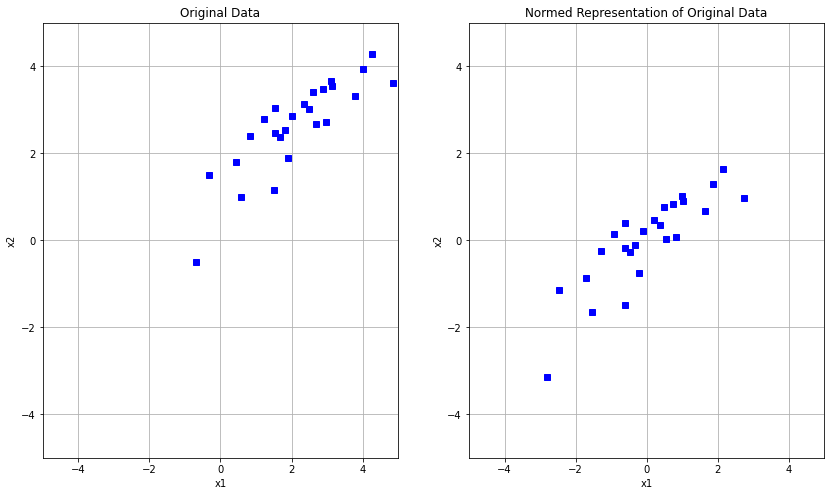

In [45]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.axis([-5,5,-5,5])
plt.plot(pointlist[:,0],pointlist[:,1],'bs')
plt.grid(True)
plt.title('Original Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.subplot(1,2,2)
plt.axis([-5,5,-5,5])
plt.plot(Normedpointlist[:,0],Normedpointlist[:,1],'bs')
plt.grid(True)
plt.title('Normed Representation of Original Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Calculate Eigenvectors and Eigenvalues

In [46]:
eigVal,eigVec=np.linalg.eig(coPoint)
print('Eigenvectors of covariance matrix:')
print(eigVec)
print('Eigenvalues of covariance matrix:')
print(eigVal)

Eigenvectors of covariance matrix:
[[ 0.805 -0.593]
 [ 0.593  0.805]]
Eigenvalues of covariance matrix:
[2.818 0.211]


Reorder Eigenvectors and Eigenvalues according to descending Eigenvalues

In [47]:
ind = eigVal.argsort()
ind = np.fliplr([ind])[0,:]#fliplr requires a 2-dim Matrix. 
eigVal = eigVal[ind]
eigVec = eigVec.transpose()[ind].transpose()#matrix is first transposed in order to reorder columns not rows. After reordering it is again transposed
print('Eigenvectors of covariance matrix after reordering:')
print(eigVec)
print('Eigenvalues of covariance matrix: after reordering')
print(eigVal)

Eigenvectors of covariance matrix after reordering:
[[ 0.805 -0.593]
 [ 0.593  0.805]]
Eigenvalues of covariance matrix: after reordering
[2.818 0.211]


Visualize Eigenvectors and Eigenvalues in plot of normalized data.

[-3.684 -2.947 -2.21  -1.474 -0.737  0.     0.737  1.474  2.21   2.947]


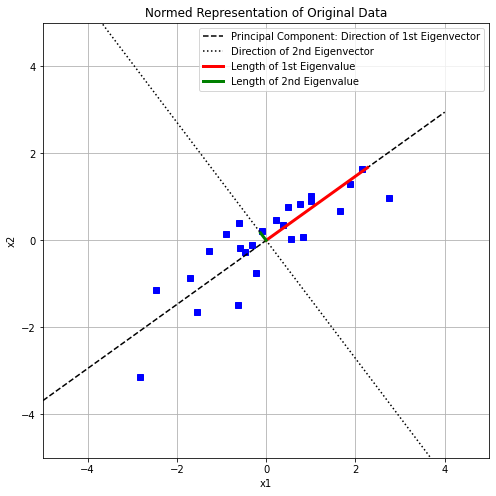

In [48]:
plt.figure(figsize=(8,8))
x=np.arange(-5,5)
O=[0,0]
P1=[eigVal[0]*eigVec[0,0],eigVal[0]*eigVec[1,0]]
P2=[eigVal[1]*eigVec[0,1],eigVal[1]*eigVec[1,1]]
print(x*eigVec[1,0]/eigVec[0,0])
y1=x*eigVec[1,0]/eigVec[0,0]
y2=x*eigVec[1,1]/eigVec[0,1]
plt.axis([-5,5,-5,5])
# Plot the normalized pointset
plt.plot(Normedpointlist[:,0],Normedpointlist[:,1],'bs')
plt.grid(True)
plt.title('Normed Representation of Original Data')
plt.xlabel('x1')
plt.ylabel('x2')
# Plot the Eigenvectors
plt.plot(x,y1,'k--',label='Principal Component: Direction of 1st Eigenvector')
plt.plot(x,y2,'k:',label='Direction of 2nd Eigenvector')
plt.plot([O[0],P1[0]],[O[1],P1[1]],'r',linewidth=3,label='Length of 1st Eigenvalue')
plt.plot([O[0],P2[0]],[O[1],P2[1]],'g',linewidth=3,label='Length of 2nd Eigenvalue')
plt.legend()
plt.show()

The figure above demonstrates, that the direction of the principal component (i.e. the Eigenvector whose Eigenvalue is maximal) is the direction of maximum variance in the data. The second Eigenvector is orthogonal to the first Eigenvector. 

Transform the normalized data into

  * 2-dimensional Eigenspace (corresponding transformation matrix contains both Eigenvectors as columns)
  * 1-dimensional Eigenspace (corresponding transformation matrix contains only 1st Eigenvector as column)



Transformed Data in 2-dimensional Eigenspace:
[[ 0.043  0.466 -2.65  -0.315 -1.179 -1.377 -0.536 -1.881  2.275 -2.22
   0.453 -4.134  0.512 -0.581 -0.241  0.714  2.782  0.843  1.356  1.1
   2.708  1.734  1.4   -0.626 -0.646]
 [ 0.233 -0.298  0.545  0.102  0.566 -0.824  0.059  0.323 -0.076 -0.417
   0.26  -0.862  0.073  0.215  0.682 -0.43  -0.847  0.332  0.128  0.226
   0.047 -0.437  0.221 -0.48   0.658]]
Transformed Data in 1-dimensional Eigenspace:
[ 0.043  0.466 -2.65  -0.315 -1.179 -1.377 -0.536 -1.881  2.275 -2.22
  0.453 -4.134  0.512 -0.581 -0.241  0.714  2.782  0.843  1.356  1.1
  2.708  1.734  1.4   -0.626 -0.646]


Text(0.5, 0, 'y1')

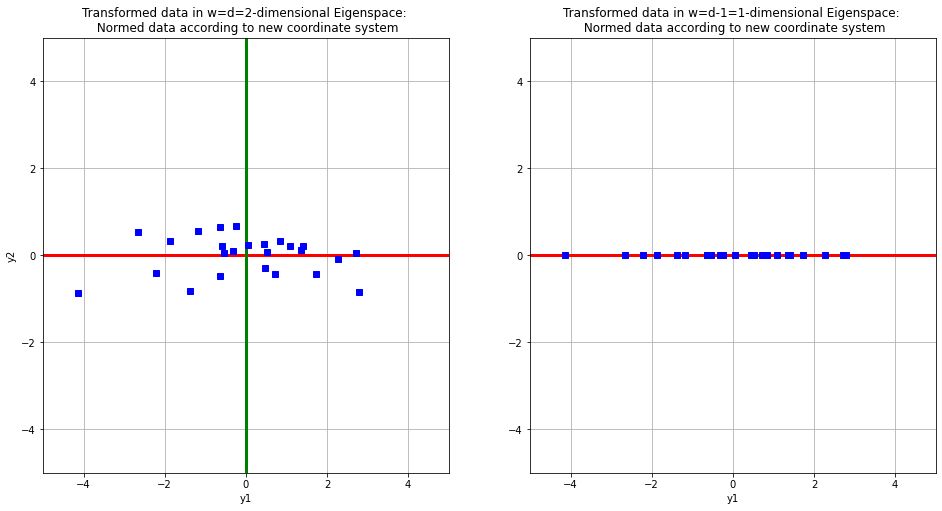

In [49]:
Y=np.dot(eigVec.transpose(),Normedpointlist.transpose())
print('Transformed Data in 2-dimensional Eigenspace:')
print(Y)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.axis([-5,5,-5,5])
plt.grid(True)
plt.axhline(linewidth=3,color='r',label='Principal Component')
plt.axvline(linewidth=3,color='g',label='Direction of 2nd Eigenvector')
plt.plot(Y[0,:].round(3),Y[1,:].round(3),'sb')
plt.title('Transformed data in w=d=2-dimensional Eigenspace: \n Normed data according to new coordinate system')
plt.xlabel('y1')
plt.ylabel('y2')

Y1=np.dot(eigVec[:,0].transpose(),Normedpointlist.transpose())
print('Transformed Data in 1-dimensional Eigenspace:')
print(Y1)
yvals=np.zeros(Y1.shape[0])
plt.subplot(1,2,2)
plt.axis([-5,5,-5,5])
plt.grid(True)
plt.axhline(linewidth=3,color='r',label='Hauptachse')
plt.plot(Y1.round(3),yvals.round(3),'sb')
plt.title('Transformed data in w=d-1=1-dimensional Eigenspace: \n Normed data according to new coordinate system')
plt.xlabel('y1')

### LDA
LDA is similar to PCA in the sense that it transforms data into a lower-dimensional space, such that a maximum amount of *information* is retained. The main differences are:
* In contrast to PCA LDA requires **labeled data**
* PCA finds a subspace, such that a maximum of the **variance** of the original data is retained. LDA finds a subspace, such that the class-separability is retained as much as possible.

### PCA and LDA in scikit-learn
The following code-cell demonstrates the application of the [scikit-learn PCA module](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) and the [scikit-learn LDA module](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis). In this demonstration the 4-dimensional Iris-dataset is transformed into a 2-dimensional space. 

In [50]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
print("Size of feature matrix:",X.shape)
print("First 10 instances:")
print(X[:10])

Size of feature matrix: (150, 4)
First 10 instances:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [51]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print("Size of matrix:",X_r.shape)
print("First 10 instances:")
print(X_r[:10])

Size of matrix: (150, 2)
First 10 instances:
[[-2.684  0.319]
 [-2.714 -0.177]
 [-2.889 -0.145]
 [-2.745 -0.318]
 [-2.729  0.327]
 [-2.281  0.741]
 [-2.821 -0.089]
 [-2.626  0.163]
 [-2.886 -0.578]
 [-2.673 -0.114]]


In [52]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print('First principal component explains %2.3f of the original variance'%pca.explained_variance_ratio_[0])
print('Second principal component explains %2.3f of the original variance'%pca.explained_variance_ratio_[1])
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

explained variance ratio (first two components): [0.925 0.053]
First principal component explains 0.925 of the original variance
Second principal component explains 0.053 of the original variance


<Figure size 864x576 with 0 Axes>

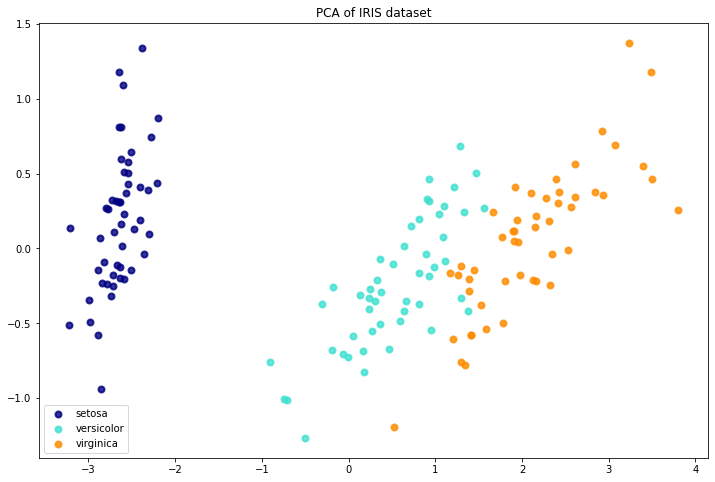

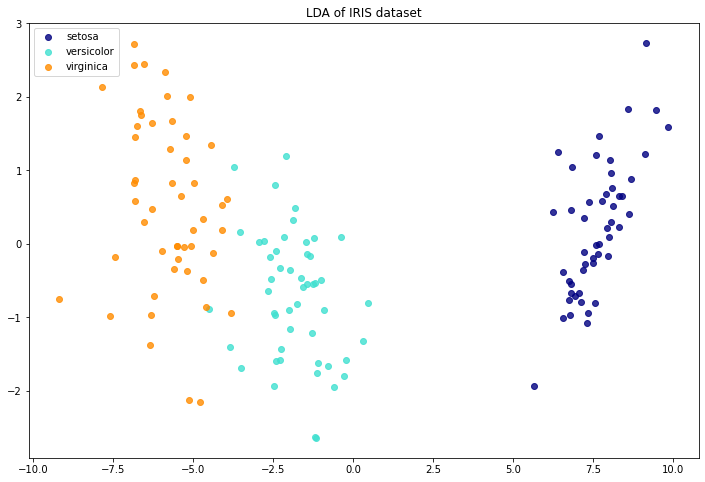

In [53]:
plt.figure(figsize=(12,8))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure(figsize=(12,8))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()